In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.ensemble import *

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

import xgboost


from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA


from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [2]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''
sns.set_style("white")

# Data Import 

In [3]:
train_df_raw = pd.read_csv('Project2_Train.csv')
display(train_df_raw.head())

test_df_raw = pd.read_csv('Project2_Test.csv')
display(test_df_raw.head())

,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,VehicleDamage,Premium,Vintage,Response,Mystery
0,1,319654,Male,22,46,< 1 Year,Yes,29719,79,0,M3
1,2,298528,Female,40,28,1-2 Year,Yes,29645,99,0,M20
2,3,120858,Male,25,28,1-2 Year,Yes,35996,266,1,M3
3,4,234326,Female,25,29,< 1 Year,No,56899,25,0,M20
4,5,372307,Female,70,28,1-2 Year,No,47452,189,0,M17


,Unnamed: 0,id,Gender,Age,Region_Code,Age.1,Damage,Premium,Vintage,Response,Mystery
0,1,121588,Female,24,28,< 1 Year,Yes,2630,271,0,M1
1,2,44234,Male,23,28,1-2 Year,Yes,40523,244,0,M20
2,3,65903,Male,51,28,1-2 Year,Yes,40951,33,0,M7
3,4,264705,Female,31,46,< 1 Year,Yes,42505,191,0,M9
4,5,364309,Male,51,46,1-2 Year,Yes,38232,151,1,M2


In [4]:
train_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  int64 
 1   id             10000 non-null  int64 
 2   Gender         10000 non-null  object
 3   Age            10000 non-null  int64 
 4   Region_Code    10000 non-null  int64 
 5   Age.1          10000 non-null  object
 6   VehicleDamage  10000 non-null  object
 7   Premium        10000 non-null  int64 
 8   Vintage        10000 non-null  int64 
 9   Response       10000 non-null  int64 
 10  Mystery        10000 non-null  object
dtypes: int64(7), object(4)
memory usage: 859.5+ KB


In [5]:
train_df = train_df_raw.copy()

# Make male = 1 female = 0 
train_df['Gender'] = train_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train_df['VehicleDamage'] = train_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train_df = pd.get_dummies(train_df, columns=['Age.1'])
train_df = pd.get_dummies(train_df, columns=['Region_Code'])


# Drop mystery 
train_df = train_df.drop('Mystery', axis=1)
train_df = train_df.drop('Unnamed: 0', axis=1)

train_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,319654,1,22,1,29719,79,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,298528,0,40,1,29645,99,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,120858,1,25,1,35996,266,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,234326,0,25,0,56899,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,372307,0,70,0,47452,189,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,0,1,0,0,0,0,0,0,0,0,1,0,0
9996,366284,1,43,1,28945,66,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9997,369037,0,46,0,2630,286,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [6]:
test_df = test_df_raw.copy()

# Make male = 1 female = 0 
test_df['Gender'] = test_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
test_df['Damage'] = test_df['Damage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
test_df = pd.get_dummies(test_df, columns=['Age.1'])
test_df = pd.get_dummies(test_df, columns=['Region_Code'])

# Drop mystery 
test_df = test_df.drop('Mystery', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

test_df

,id,Gender,Age,Damage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,121588,0,24,1,2630,271,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,44234,1,23,1,40523,244,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,65903,1,51,1,40951,33,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,264705,0,31,1,42505,191,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,364309,1,51,1,38232,151,1,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,123293,1,49,0,33720,161,0,1,0,0,0,0,0,0,1,0,0,0,0,0
9996,110877,1,43,1,23176,171,1,1,0,0,0,0,0,0,0,0,0,0,1,0
9997,207348,1,36,0,2630,16,0,1,0,0,0,0,1,0,0,0,0,0,0,0
9998,89084,1,36,1,26275,230,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# Data Exploration 

<AxesSubplot:xlabel='Gender', ylabel='count'>

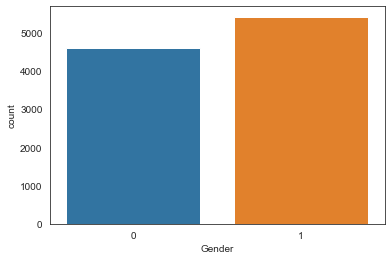

In [7]:
sns.countplot(data=train_df, x='Gender')

<AxesSubplot:xlabel='Response', ylabel='count'>

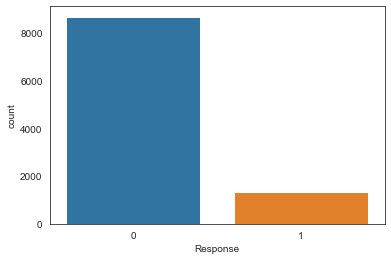

In [8]:
sns.countplot(data=train_df, x='Response')

In [9]:
'''
temp = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response']

sns.pairplot(data=train_df.loc[:,temp])
'''

"\ntemp = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response']\n\nsns.pairplot(data=train_df.loc[:,temp])\n"

# Functions

In [24]:
def data_generation(df, features, target):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    y = df_temp[target]
    X = df_temp.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    return([X_train, X_test, y_train, y_test])


#--------------------------------------------------------------------------------------------------


def classification_stats(X_train, y_train, X_test, y_test, model_used, model_name):
    
    y_pred = model_used.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)

    gmeans = (tpr * (1-fpr))**.5
    ix = np.argmax(gmeans)

    y_pred = (model_used.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

    print("The Training Accuracy is: ", model_used.score(X_train, y_train))
    print("The Testing Accuracy is: ", model_used.score(X_test, y_test))
    print(classification_report(y_test, y_pred, target_names=['Bad Response', 'Good Response']))

    #--------------------------------------------------------------------------------------------------
    print('This is the confusion matrix of the optimum threshold for this particular model')
    
    y_pred_proba = model_used.predict_proba(X_test)[:,1]
    y_pred = (y_pred_proba > thresholds[ix]).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=model_used.classes_)
    
    fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
    fig.set_xlabel('Predicted labels')
    fig.set_ylabel('True labels')
    fig.set_title('Confusion Matrix when Threshold = ' + str(thresholds[ix]*100) + '%')
    fig.set_ylim([0,2])

    plt.savefig('temp.png', transparent=True, dpi=600)
    plt.show()

    #--------------------------------------------------------------------------------------------------
    # Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    #--------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(16,9))
    fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

    #--------------------------------------------------------------------------------------------------
    # Test performance
    y_pred = model_used.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    auc = roc_auc_score(y_test, y_pred)
    fig = sns.lineplot(x=fpr, y=tpr, label=f'Validation AUC: {round(auc,3)}', ci=None, color='#edb021')

    #--------------------------------------------------------------------------------------------------
    # Train performance
    y_pred = model_used.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_pred)

    auc = roc_auc_score(y_train, y_pred)
    fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


    gmeans = (tpr * (1-fpr))**.5
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


    #--------------------------------------------------------------------------------------------------
    plt.legend()
    fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    plt.suptitle(model_name, fontsize = 24)
    plt.savefig('temp.png', transparent=True)
    plt.show() 
    

#--------------------------------------------------------------------------------------------------

def PRAUC_generator(X_train, y_train, model_used, model_name):
    # Training Set
    y_pred_proba = model_used.predict_proba(X_train)[:, 1]
    precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
    average_precision = average_precision_score(y_train, y_pred_proba)

    plt.figure(figsize = (8,6))
    sns.lineplot(x=recall, y=precision,
                 label = 'PRAUC = %0.3f' % average_precision, color='#edb021')
    baseline = len(y_val[y_val==1]) / len(y_val)
    sns.lineplot(x=[0,1], y=[baseline, baseline], label = f'Baseline: {round(baseline, 3)}', color='#767676')
    plt.legend(loc = 'upper right')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.yticks(np.arange(0, 1, step=0.1))
    plt.xticks(np.arange(0, 1, step=0.1))
    plt.title(f'{model_name} Precision-Recall Curve [Training]')
    plt.show()
    
    
def feature_selection_results(X_train, model_used, model_name):
    importance = model_used.named_steps["mdl"].coef_[0].tolist()
    f = X_train.columns
    temp = pd.DataFrame({'features':f, 'values':importance})
    temp = temp.sort_values('values', ascending=False)

    display(temp)

    fig = plt.figure(figsize=(16,9))
    plt.suptitle(f'{model_name} Importances', fontsize = 24)
    sns.barplot(data=temp, x='values', y='features', color='#767676')
    plt.show()

# Showing SMOTE

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


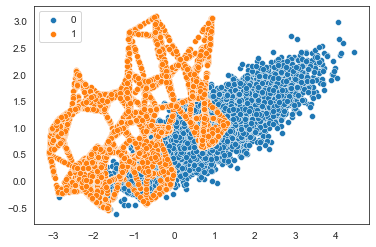

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


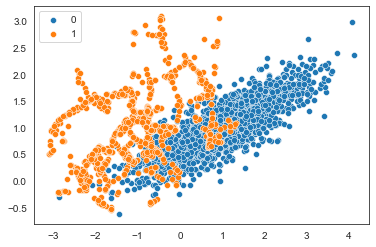

In [11]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	sns.scatterplot(x=X[row_ix, 0], y=X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#--------------------------------------------------------------------------------------------------
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	sns.scatterplot(x=X[row_ix, 0], y=X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

# Hyper parameter tuning SMOTE

In [17]:
%%time
# Hyper parameter tuning
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

parameters = {
'over__k_neighbors' : np.arange(1,5,1),
'over__sampling_strategy' : np.arange(0,1,.2),
'under__sampling_strategy' : np.arange(0,1,.2),
}

#--------------------------------------------------------------------------------------------------
X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')

logreg = Pipeline(steps=[('over', SMOTE(random_state=0)),
                         ('under', RandomUnderSampler()),
                         ("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg_GS = GridSearchCV(estimator=logreg, param_grid=parameters, n_jobs=-1, cv=10,
                             scoring='accuracy',error_score=0, return_train_score = True,
                             verbose = 2)

logreg_GS.fit(X_train, y_train)

print('Model Best Params: ')
print(logreg_GS.best_params_)



Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Model Best Params: 
{'over__k_neighbors': 2, 'over__sampling_strategy': 0.2, 'under__sampling_strategy': 0.2}
CPU times: user 1.51 s, sys: 200 ms, total: 1.71 s
Wall time: 8.86 s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 268, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 226, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
  File "/opt/anacond

In [15]:
logreg_GS.get_params()

{'cv': 10,
 'error_score': 0,
 'estimator__memory': None,
 'estimator__steps': [('over', SMOTE(random_state=0)),
  ('under', RandomUnderSampler()),
  ('scaler', StandardScaler()),
  ('mdl', LogisticRegression(penalty='none'))],
 'estimator__verbose': False,
 'estimator__over': SMOTE(random_state=0),
 'estimator__under': RandomUnderSampler(),
 'estimator__scaler': StandardScaler(),
 'estimator__mdl': LogisticRegression(penalty='none'),
 'estimator__over__k_neighbors': 5,
 'estimator__over__n_jobs': None,
 'estimator__over__random_state': 0,
 'estimator__over__sampling_strategy': 'auto',
 'estimator__under__random_state': None,
 'estimator__under__replacement': False,
 'estimator__under__sampling_strategy': 'auto',
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__mdl__C': 1.0,
 'estimator__mdl__class_weight': None,
 'estimator__mdl__dual': False,
 'estimator__mdl__fit_intercept': True,
 'estimator__mdl__intercept_

# Comparing Performance wtih SMOTE

In [18]:
%%time
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
logreg = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_train)[:, 1]
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
average_precision = average_precision_score(y_train, y_pred_proba)
print(f'PRAUC: {average_precision}')

#--------------------------------------------------------------------------------------------------

logreg = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ('under', RandomUnderSampler(sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_train)[:, 1]
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba)
average_precision = average_precision_score(y_train, y_pred_proba)
print(f'PRAUC: {average_precision}')

PRAUC: 0.3149773340151215
PRAUC: 0.3123025069758105
CPU times: user 361 ms, sys: 14.3 ms, total: 375 ms
Wall time: 106 ms


# Choice of Performance Metric<a id="section5"></a>

- **TP**: Correctly detecting a popular song [Highest Significance]
- **FP**: Wrongly detected a popular song [High Significance]
- **FN**: Fail to detect a popular song [Moderate Significance]
- **TN**: Correctly detecting an unpopular song [Low Significance]


Performance metric should prioritise maximising TP and minimising FP. If possible, FN should be minimised as well. 

Based on the above classfication of significance, the **Precision score (TP/TP+FP)** should be as high as possible, correctly **predicting more positives** and **falsely predicting less positives**. 

However, we should not only use Precision as the evaluation metric as FNs should are of moderate significance. In order to **minimise FNs, the Recall score should be as higher as possible**.

In order to maximise Recall and Precision, **Precision-Recall Area Under Curve (PR AUC)** should be the main evaluation metric.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248

https://glassboxmedicine.com/2019/03/02/measuring-performance-auprcz


# Logistic Regression 

The Training Accuracy is:  0.8705970149253731
The Testing Accuracy is:  0.8606060606060606
               precision    recall  f1-score   support

 Bad Response       0.98      0.62      0.76      2841
Good Response       0.29      0.93      0.44       459

     accuracy                           0.67      3300
    macro avg       0.63      0.78      0.60      3300
 weighted avg       0.89      0.67      0.72      3300

This is the confusion matrix of the optimum threshold for this particular model


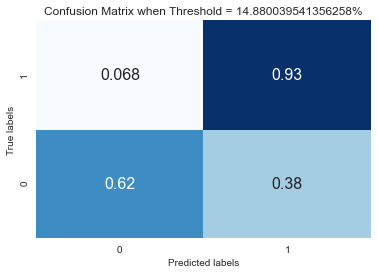

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.148800, G-Mean=0.772


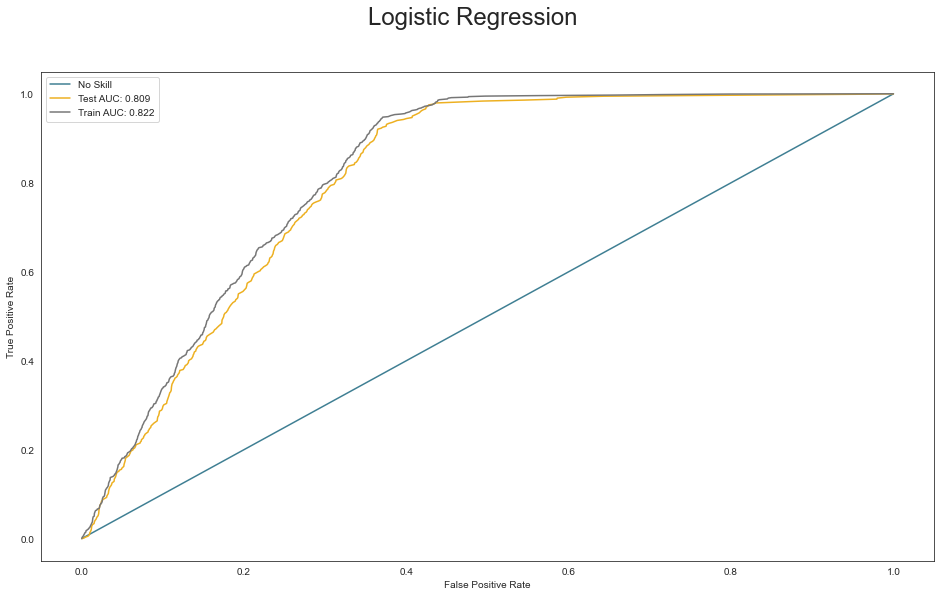

CPU times: user 2.28 s, sys: 89.2 ms, total: 2.37 s
Wall time: 910 ms


In [19]:
%%time
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
logreg = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ('under', RandomUnderSampler(sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                         ("mdl", LogisticRegression(penalty='none'))])

logreg.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, logreg, 'Logistic Regression')

### PRAUC

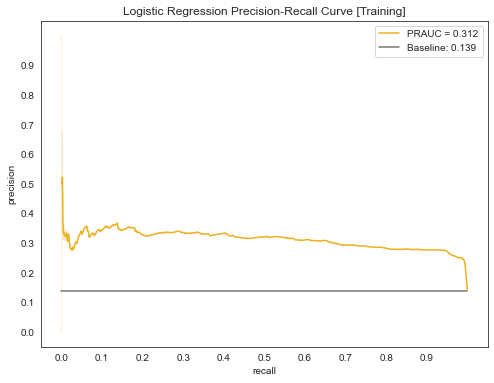

In [20]:
PRAUC_generator(X_train, y_train, logreg, 'Logistic Regression')

### Feature Selection

,features,values
2,VehicleDamage,2.093240
4,Vintage,0.003368
3,Premium,-0.011864
0,Gender,-0.050829
1,Age,-0.303678
7,Age.1_> 2 Years,-3.327119
17,Region_Code_50,-3.394536
10,Region_Code_11,-3.674068
8,Region_Code_3,-3.760511
13,Region_Code_29,-3.934774


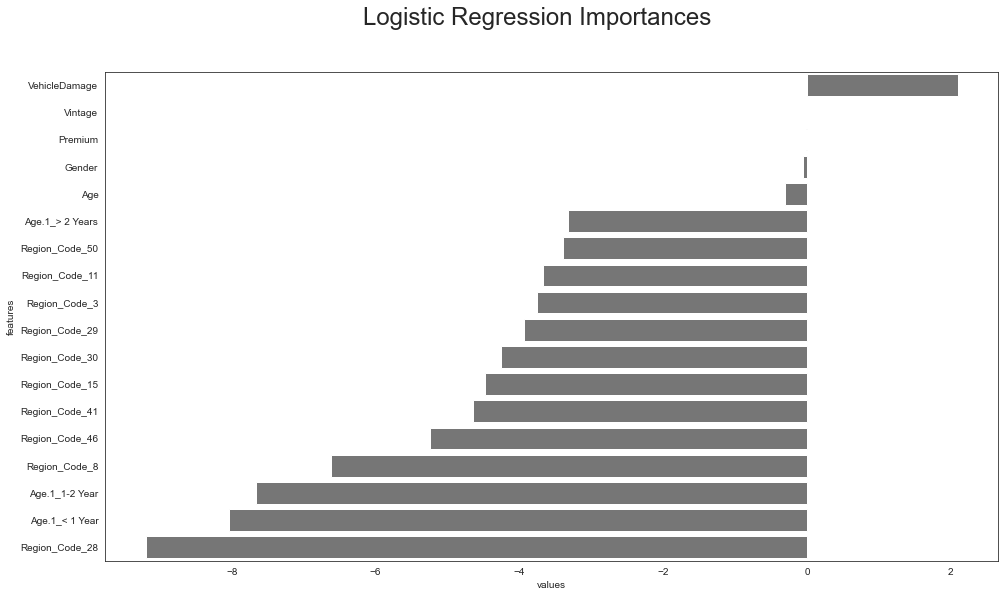

In [21]:
feature_selection_results(X_train, logreg, 'Logistic Regression')

<br>

<br>

# Choosing a Complex Model

In [22]:
%%time
results = []
names = []

#--------------------------------------------------------------------------------------------------

temp = []
models = []
models.append(('Logistic', LogisticRegression()))

models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))

models.append(('K Neigbor Classifier', KNeighborsClassifier()))

models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))

models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))

models.append(('Ada boost', AdaBoostClassifier()))
models.append(('Gradient boosting', GradientBoostingClassifier()))

models.append(('Bagging classifier', BaggingClassifier()))

#--------------------------------------------------------------------------------------------------
# VOTING
logistic = LogisticRegression()
svc = SVC()
svm = SVC(kernel = 'rbf')
mlp = MLPClassifier(alpha=1, max_iter=1000)

list_models = [('logistic', logistic),
               ('svc', svc), 
               ('svm', svm),
               ('mlp', mlp)
              ]
models.append(('Voting regressor', VotingClassifier(estimators=list_models)))

for name, model in models:
    mdl = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ('under', RandomUnderSampler(sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='accuracy', n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean()), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'Accuracy', 'Accuracy_std'])
mdl_performance = mdl_performance.sort_values('Accuracy', ascending=False)
mdl_performance

CPU times: user 64.7 ms, sys: 10.9 ms, total: 75.6 ms
Wall time: 6.78 s


,model,Accuracy,Accuracy_std
0,Logistic,0.870896,0.000149
4,Support Vector Classifier,0.870597,0.000149
5,Support Vector Machines,0.870597,0.000149
10,Voting regressor,0.870597,0.000149
6,MLP,0.868209,0.001045
8,Gradient boosting,0.868209,0.000448
7,Ada boost,0.862090,0.005075
1,Random Forest,0.852090,0.000746
3,K Neigbor Classifier,0.843881,0.002090
9,Bagging classifier,0.838060,0.003731


# Gradient Boost No Hyperparameter Tuning

The Training Accuracy is:  0.875223880597015
The Testing Accuracy is:  0.8584848484848485
               precision    recall  f1-score   support

 Bad Response       0.96      0.71      0.81      2841
Good Response       0.31      0.82      0.45       459

     accuracy                           0.72      3300
    macro avg       0.64      0.76      0.63      3300
 weighted avg       0.87      0.72      0.76      3300

This is the confusion matrix of the optimum threshold for this particular model


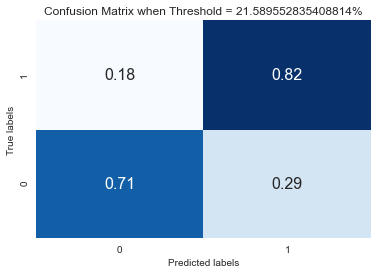

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.215896, G-Mean=0.804


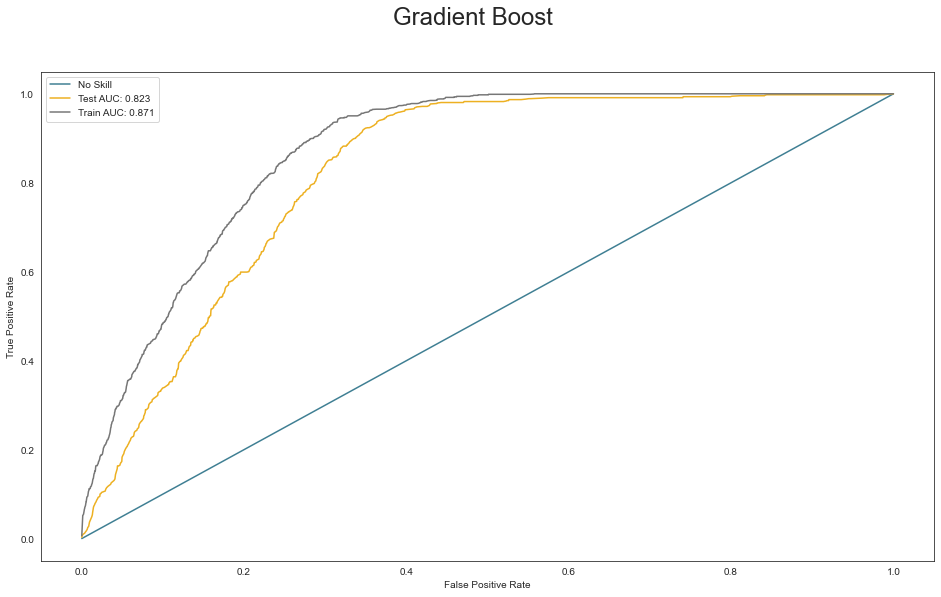

In [23]:
grad_boost = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ('under', RandomUnderSampler(sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grad_boost.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, grad_boost, 'Gradient Boost')

# Gradient Boost With Hyperparameter tuning 

In [44]:
%%time
# Hyper parameter tuning
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

parameters = {
    "mdl__n_estimators":[None,5,50,250,500],
    "mdl__max_depth":[None,1,3,5,7],
    "mdl__learning_rate":[0.01],
    'mdl__min_samples_leaf': [1,2],
    
}

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ('under', RandomUnderSampler(sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                        ("mdl", GradientBoostingClassifier())])

grad_boost_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                             scoring='accuracy',error_score=0, return_train_score = True,
                             verbose = 2)

grad_boost_GS.fit(X_train, y_train)

print('Model Best Params: ')
print(grad_boost_GS.best_params_)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/

Model Best Params: 
{'mdl__learning_rate': 0.01, 'mdl__max_depth': 3, 'mdl__min_samples_leaf': 1, 'mdl__n_estimators': 250}
CPU times: user 3.81 s, sys: 253 ms, total: 4.06 s
Wall time: 5min 15s


In [45]:
# parameters to hyper tune
print('Gradient Boost Params: ')
grad_boost_GS.get_params()

Gradient Boost Params: 


{'cv': 10,
 'error_score': 0,
 'estimator__memory': None,
 'estimator__steps': [('over',
   SMOTE(k_neighbors=2, random_state=0, sampling_strategy=0.2)),
  ('under', RandomUnderSampler(sampling_strategy=0.2)),
  ('scaler', StandardScaler()),
  ('mdl', GradientBoostingClassifier())],
 'estimator__verbose': False,
 'estimator__over': SMOTE(k_neighbors=2, random_state=0, sampling_strategy=0.2),
 'estimator__under': RandomUnderSampler(sampling_strategy=0.2),
 'estimator__scaler': StandardScaler(),
 'estimator__mdl': GradientBoostingClassifier(),
 'estimator__over__k_neighbors': 2,
 'estimator__over__n_jobs': None,
 'estimator__over__random_state': 0,
 'estimator__over__sampling_strategy': 0.2,
 'estimator__under__random_state': None,
 'estimator__under__replacement': False,
 'estimator__under__sampling_strategy': 0.2,
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__mdl__ccp_alpha': 0.0,
 'estimator__mdl__criterion'

The Training Accuracy is:  0.871044776119403
The Testing Accuracy is:  0.860909090909091
               precision    recall  f1-score   support

 Bad Response       0.98      0.67      0.79      2841
Good Response       0.31      0.91      0.46       459

     accuracy                           0.70      3300
    macro avg       0.64      0.79      0.63      3300
 weighted avg       0.89      0.70      0.75      3300

This is the confusion matrix of the optimum threshold for this particular model


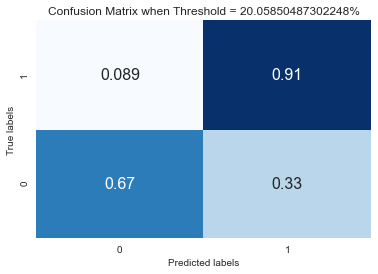

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.200585, G-Mean=0.785


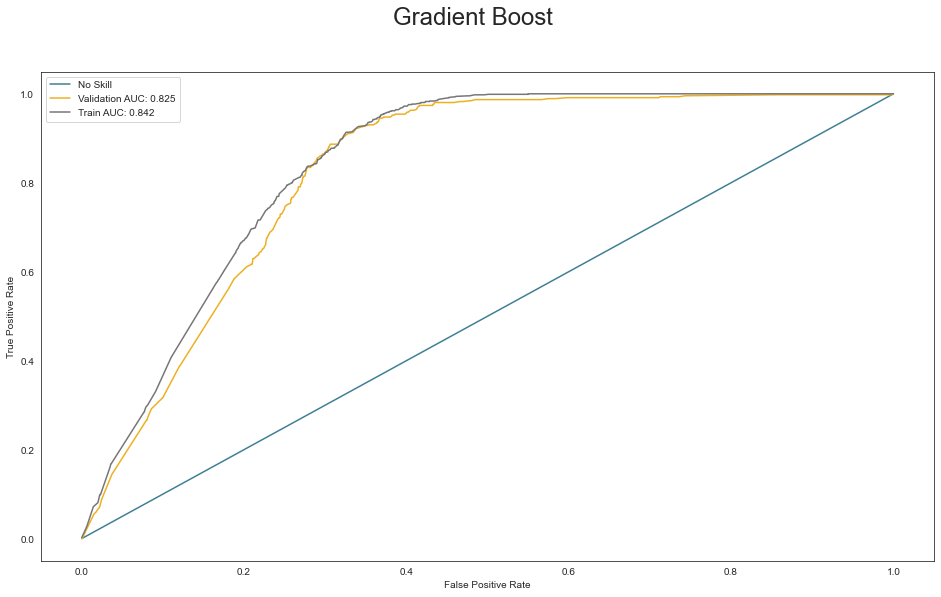

In [46]:
classification_stats(X_train, y_train, X_val, y_val, grad_boost_GS, 'Gradient Boost')

### PRAUC

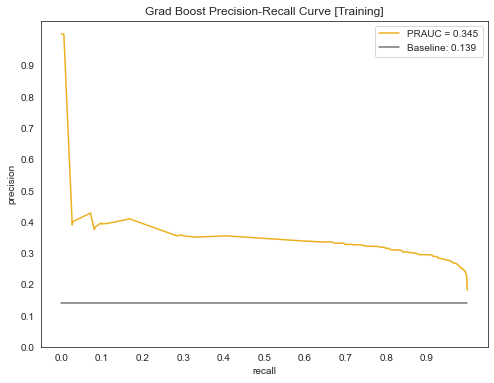

In [47]:
PRAUC_generator(X_train, y_train, grad_boost_GS, 'Grad Boost')

### Feature Importance 

,features,values
2,VehicleDamage,0.699115
1,Age,0.150730
8,Age.1_> 2 Years,0.041516
6,Age.1_1-2 Year,0.028955
10,Region_Code_8,0.019968
7,Age.1_< 1 Year,0.016811
17,Region_Code_46,0.014236
12,Region_Code_15,0.009328
4,Vintage,0.005684
5,Mystery,0.005598


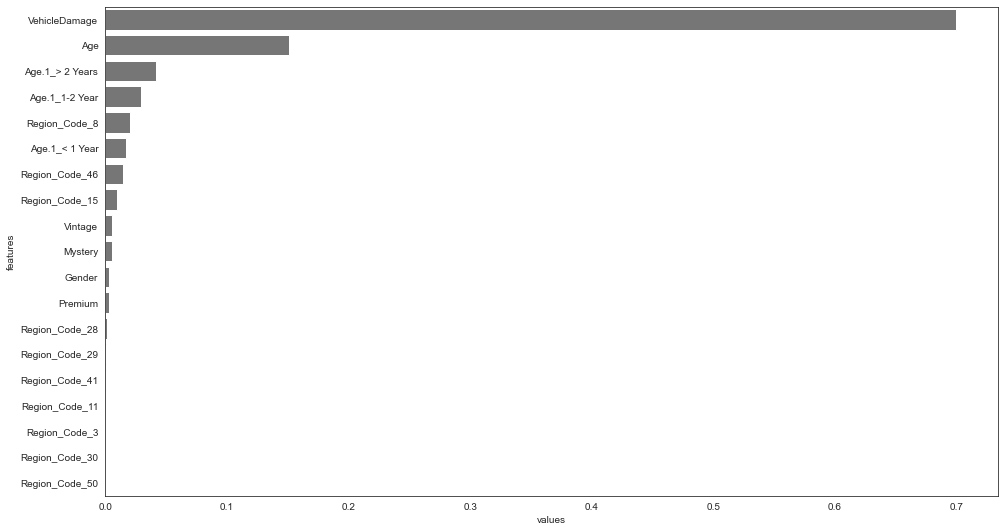

In [49]:
importance = grad_boost_GS.best_estimator_.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

# Part 2: Mystery

### One Hot

In [30]:
train2_df = train_df_raw.copy()

# Make male = 1 female = 0 
train2_df['Gender'] = train2_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train2_df['VehicleDamage'] = train2_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train2_df = pd.get_dummies(train2_df, columns=['Age.1'])
train2_df = pd.get_dummies(train2_df, columns=['Region_Code'])
train2_df = pd.get_dummies(train2_df, columns=['Mystery'])

# Drop mystery 
train2_df = train2_df.drop('Unnamed: 0', axis=1)

train2_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Age.1_1-2 Year,Age.1_< 1 Year,Age.1_> 2 Years,...,Mystery_M19,Mystery_M2,Mystery_M20,Mystery_M3,Mystery_M4,Mystery_M5,Mystery_M6,Mystery_M7,Mystery_M8,Mystery_M9
0,319654,1,22,1,29719,79,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,298528,0,40,1,29645,99,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,120858,1,25,1,35996,266,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,234326,0,25,0,56899,25,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,372307,0,70,0,47452,189,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9996,366284,1,43,1,28945,66,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9997,369037,0,46,0,2630,286,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


The Training Accuracy is:  1.0
The Testing Accuracy is:  0.8503030303030303
               precision    recall  f1-score   support

 Bad Response       0.87      0.98      0.92      2841
Good Response       0.43      0.10      0.16       459

     accuracy                           0.86      3300
    macro avg       0.65      0.54      0.54      3300
 weighted avg       0.81      0.86      0.82      3300

This is the confusion matrix of the optimum threshold for this particular model


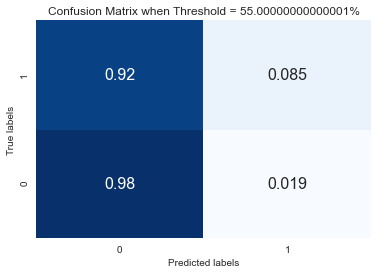

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.550000, G-Mean=1.000


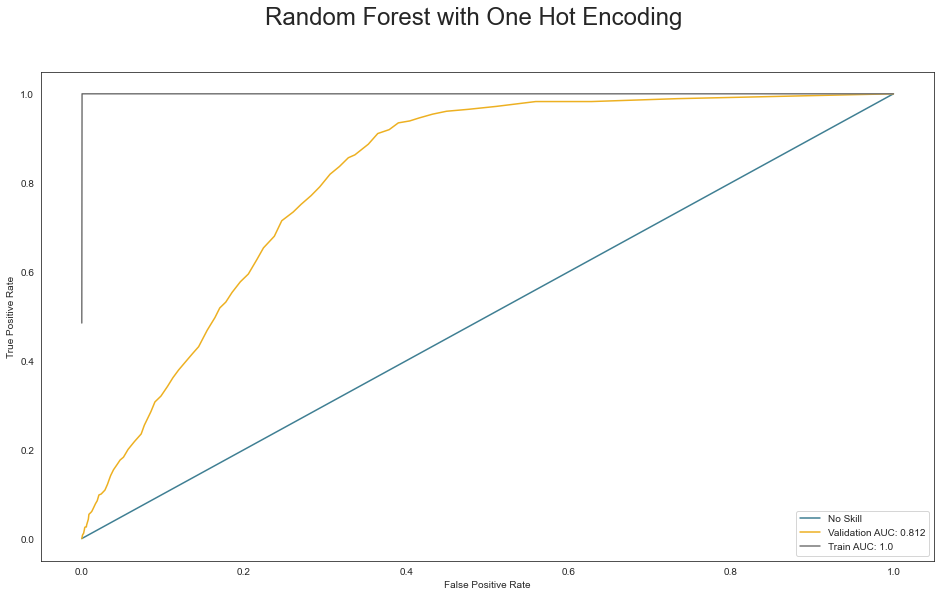

In [31]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage', 'Response',
            'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years','Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28',
            'Region_Code_29', 'Region_Code_30', 'Region_Code_41', 'Region_Code_46',
            'Region_Code_50', 'Mystery_M1', 'Mystery_M10', 'Mystery_M11', 'Mystery_M12',
            'Mystery_M13', 'Mystery_M14', 'Mystery_M15', 'Mystery_M16', 'Mystery_M17',
            'Mystery_M18', 'Mystery_M19', 'Mystery_M2', 'Mystery_M20', 'Mystery_M3',
            'Mystery_M4','Mystery_M5', 'Mystery_M6', 'Mystery_M7', 'Mystery_M8', 'Mystery_M9']

X_train, X_val, y_train, y_val = data_generation(train2_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
random_forest_one_hot = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ('under', RandomUnderSampler(sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

random_forest_one_hot.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, random_forest_one_hot, 'Random Forest with One Hot Encoding')

,features,values
1,Age,0.175456
4,Vintage,0.173142
3,Premium,0.167455
2,VehicleDamage,0.127622
6,Age.1_< 1 Year,0.035172
0,Gender,0.024168
5,Age.1_1-2 Year,0.023400
12,Region_Code_28,0.017572
7,Age.1_> 2 Years,0.016372
25,Mystery_M16,0.011652


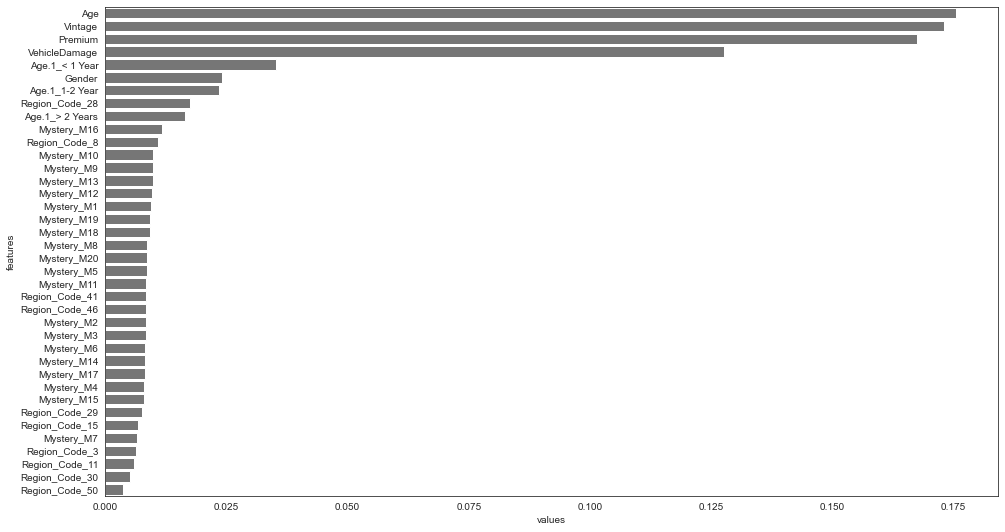

In [32]:
importance = random_forest_one_hot.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

### Integer Encoding

In [33]:
train3_df = train_df_raw.copy()

# Make male = 1 female = 0 
train3_df['Gender'] = train3_df['Gender'].apply(lambda x: 1 if (x == 'Male') else 0)

# Vehicle damage yes = 1 
train3_df['VehicleDamage'] = train3_df['VehicleDamage'].apply(lambda x: 1 if (x == 'Yes') else 0)

# Dummify Age.1 
train3_df = pd.get_dummies(train3_df, columns=['Age.1'])
train3_df = pd.get_dummies(train3_df, columns=['Region_Code'])
train3_df['Mystery'] = train3_df['Mystery'].apply(lambda x: int(x[1:]))

# Drop mystery 
train3_df = train3_df.drop('Unnamed: 0', axis=1)

train3_df

,id,Gender,Age,VehicleDamage,Premium,Vintage,Response,Mystery,Age.1_1-2 Year,Age.1_< 1 Year,...,Region_Code_3,Region_Code_8,Region_Code_11,Region_Code_15,Region_Code_28,Region_Code_29,Region_Code_30,Region_Code_41,Region_Code_46,Region_Code_50
0,319654,1,22,1,29719,79,0,3,0,1,...,0,0,0,0,0,0,0,0,1,0
1,298528,0,40,1,29645,99,0,20,1,0,...,0,0,0,0,1,0,0,0,0,0
2,120858,1,25,1,35996,266,1,3,1,0,...,0,0,0,0,1,0,0,0,0,0
3,234326,0,25,0,56899,25,0,20,0,1,...,0,0,0,0,0,1,0,0,0,0
4,372307,0,70,0,47452,189,0,17,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,93671,1,28,1,2630,31,1,3,0,1,...,0,0,0,0,0,0,0,1,0,0
9996,366284,1,43,1,28945,66,0,13,0,0,...,0,0,0,0,0,0,0,0,1,0
9997,369037,0,46,0,2630,286,0,4,1,0,...,0,0,0,0,1,0,0,0,0,0
9998,268384,0,21,0,23031,155,0,16,0,1,...,0,0,0,0,0,0,1,0,0,0


In [34]:
train3_df.columns

Index(['id', 'Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
       'Response', 'Mystery', 'Age.1_1-2 Year', 'Age.1_< 1 Year',
       'Age.1_> 2 Years', 'Region_Code_3', 'Region_Code_8', 'Region_Code_11',
       'Region_Code_15', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30',
       'Region_Code_41', 'Region_Code_46', 'Region_Code_50'],
      dtype='object')

The Training Accuracy is:  1.0
The Testing Accuracy is:  0.853030303030303
               precision    recall  f1-score   support

 Bad Response       0.87      0.98      0.92      2841
Good Response       0.45      0.12      0.19       459

     accuracy                           0.86      3300
    macro avg       0.66      0.55      0.56      3300
 weighted avg       0.81      0.86      0.82      3300

This is the confusion matrix of the optimum threshold for this particular model


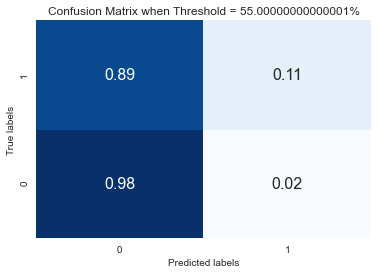

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.550000, G-Mean=1.000


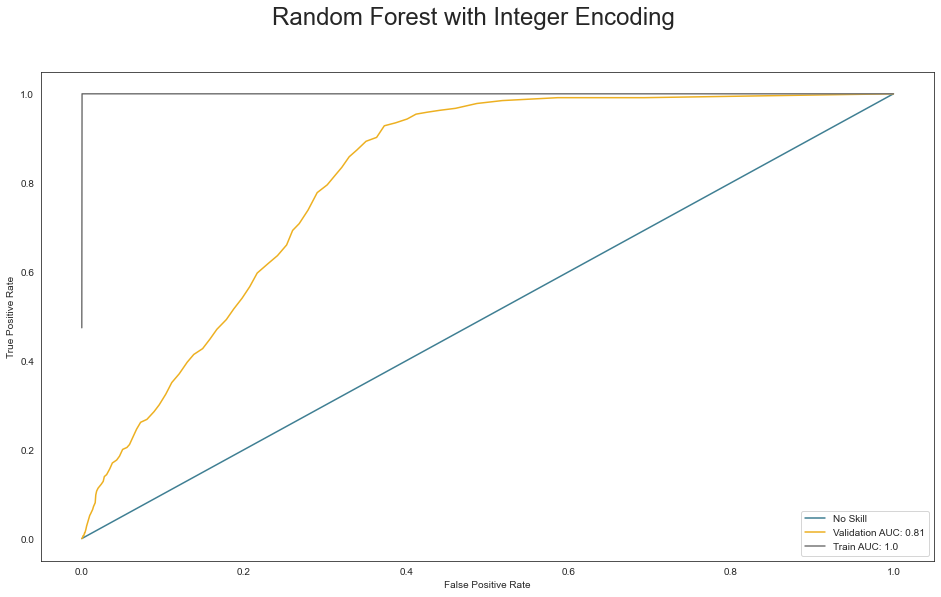

In [35]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Mystery', 'Age.1_1-2 Year', 'Age.1_< 1 Year',
            'Age.1_> 2 Years', 'Region_Code_3', 'Region_Code_8', 'Region_Code_11',
            'Region_Code_15', 'Region_Code_28', 'Region_Code_29', 'Region_Code_30',
            'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train3_df, features, 'Response')

#--------------------------------------------------------------------------------------------------
random_forest_integer = Pipeline(steps=[('over', SMOTE(random_state=0, k_neighbors=2, sampling_strategy=.2)),
                         ('under', RandomUnderSampler(sampling_strategy=.2)),
                         ("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

random_forest_integer.fit(X_train, y_train)

classification_stats(X_train, y_train, X_val, y_val, random_forest_integer, 'Random Forest with Integer Encoding')

,features,values
4,Vintage,0.193218
1,Age,0.192587
3,Premium,0.187590
5,Mystery,0.129878
2,VehicleDamage,0.126702
7,Age.1_< 1 Year,0.034619
6,Age.1_1-2 Year,0.020663
0,Gender,0.019600
8,Age.1_> 2 Years,0.018455
13,Region_Code_28,0.016584


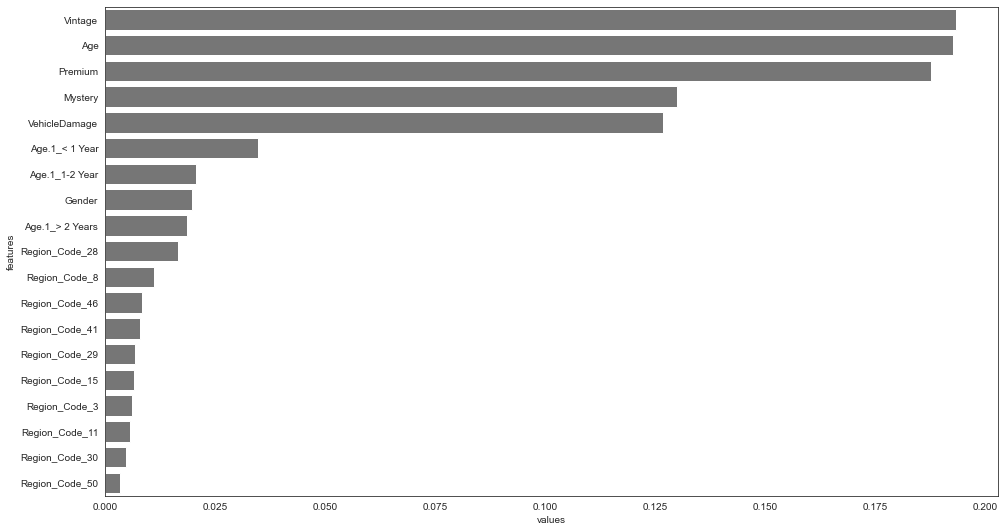

In [36]:
importance = random_forest_integer.named_steps["mdl"].feature_importances_
f = X_train.columns
temp = pd.DataFrame({'features':f, 'values':importance})
temp = temp.sort_values('values', ascending=False)


display(temp)

fig = plt.figure(figsize=(16,9))
sns.barplot(data=temp, x='values', y='features', color='#767676')
plt.show()

# Benefit Structure 

In [50]:
def findProbabilityThreshold(tp, fp, fn, tn, model, thresholds, X_train, y_train, X_test, y_test):
    confusion_matrices = []

    for i in range(0, len(thresholds)):
        threshold = thresholds[i]
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred = (y_pred_proba > threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)
    
    benefits = []

    for j in range(0, len(thresholds)):
        cm = confusion_matrices[j]
        t_neg = cm[0, 0]
        f_pos = cm[0, 1]
        f_neg = cm[1, 0]
        t_pos = cm[1, 1]
        total = t_neg + f_pos + f_neg + t_pos

        cost_of_tp = tp
        cost_of_fn = fn
        cost_of_fp = fp
        cost_of_tn = tn

        benefit = (t_pos * cost_of_tp
                   + f_neg * cost_of_fn
                   + f_pos * cost_of_fp
                   + (t_pos + f_pos) * cost_of_tn)
        benefits.append(benefit)

    print("Probability Thresholds: ")
    print(thresholds)
    print("Benefits for each probability threshold: ")
    print(benefits)
    
    print("\nBest Probability Threshold & Benefit for " + type(model).__name__ + ":")

    print("Probability Threshold: " + str(thresholds[np.argmax(benefits)] * 100) + "%")
    print("Benefit: " + str(np.max(benefits)))
    
    return thresholds[np.argmax(benefits)]

### Part 1: 
- Promote to an interested customer + 10
- Miss an interested customer - 10
- Promote to an uninterested customer - 2
- Each promotion - 1

Probability Thresholds: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Benefits for each probability threshold: 
[-4392, 78, 198, 198, 198, 198, 198, 198, 201, 225, 250, 250, 205, 245, 302, 306, 310, 218, 122, -10, -212, -290, -453, -586, -753, -998, -1198, -1299, -1405, -1553, -1807, -1932, -2156, -2420, -2916, -3213, -3471, -3696, -4011, -4107, -4324, -4418, -4518, -4589, -4600, -4604, -4611, -4602, -4599, -4599, -4593, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590, -4590,

(0.0, 2.0)

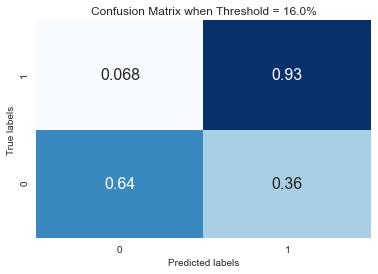

In [51]:
features = ['Gender', 'Age', 'VehicleDamage', 'Premium', 'Vintage',
            'Response', 'Age.1_1-2 Year', 'Age.1_< 1 Year', 'Age.1_> 2 Years', 'Region_Code_3',
            'Region_Code_8', 'Region_Code_11', 'Region_Code_15', 'Region_Code_28', 'Region_Code_29',
            'Region_Code_30', 'Region_Code_41', 'Region_Code_46', 'Region_Code_50']

X_train, X_val, y_train, y_val = data_generation(train_df, features, 'Response')
#--------------------------------------------------------------------------------------------------

thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = findProbabilityThreshold(10, -2, -10, -1,
                                          logreg,
                                          thresholds, 
                                          X_train, y_train,
                                         X_val, y_val)

y_pred_proba = logreg.predict_proba(X_train)[:,1]
y_pred = (y_pred_proba > best_threshold).astype(int)
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)

fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix when Threshold = ' + str(best_threshold*100) + '%')
fig.set_ylim([0,2])

### Part 2:
- Promote to an interested customer + 100
- Miss an interested customer - 100
- Promote to an uninterested customer - 2
- Each promotion - 1

Probability Thresholds: 
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Benefits for each probability threshold: 
[36918, 39768, 39888, 39888, 39888, 39888, 39888, 39888, 39891, 39915, 39580, 39040, 37915, 37055, 36572, 35676, 35320, 33788, 32072, 29780, 26158, 23920, 20877, 17864, 14637, 10792, 7532, 5451, 3545, 1057, -2797, -5442, -9266, -13850, -20466, -25083, -29661, -33126, -37221, -38937, -41494, -42848, -44208, -45179, -45550, -45734, -45921, -45912, -45909, -45909, -45903, -45900, -45900, -45900, -45900, -45900, -45900, -459

(0.0, 2.0)

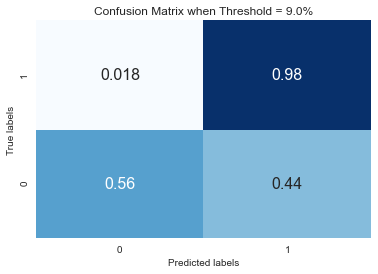

In [52]:
thresholds = np.arange(0.0, 1.0, 0.01)

best_threshold = findProbabilityThreshold(100, -2, -100, -1,
                                          logreg,
                                          thresholds,
                                          X_train, y_train,
                                         X_val, y_val)

y_pred_proba = logreg.predict_proba(X_train)[:,1]
y_pred = (y_pred_proba > best_threshold).astype(int)
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)

fig = sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix when Threshold = ' + str(best_threshold*100) + '%')
fig.set_ylim([0,2])

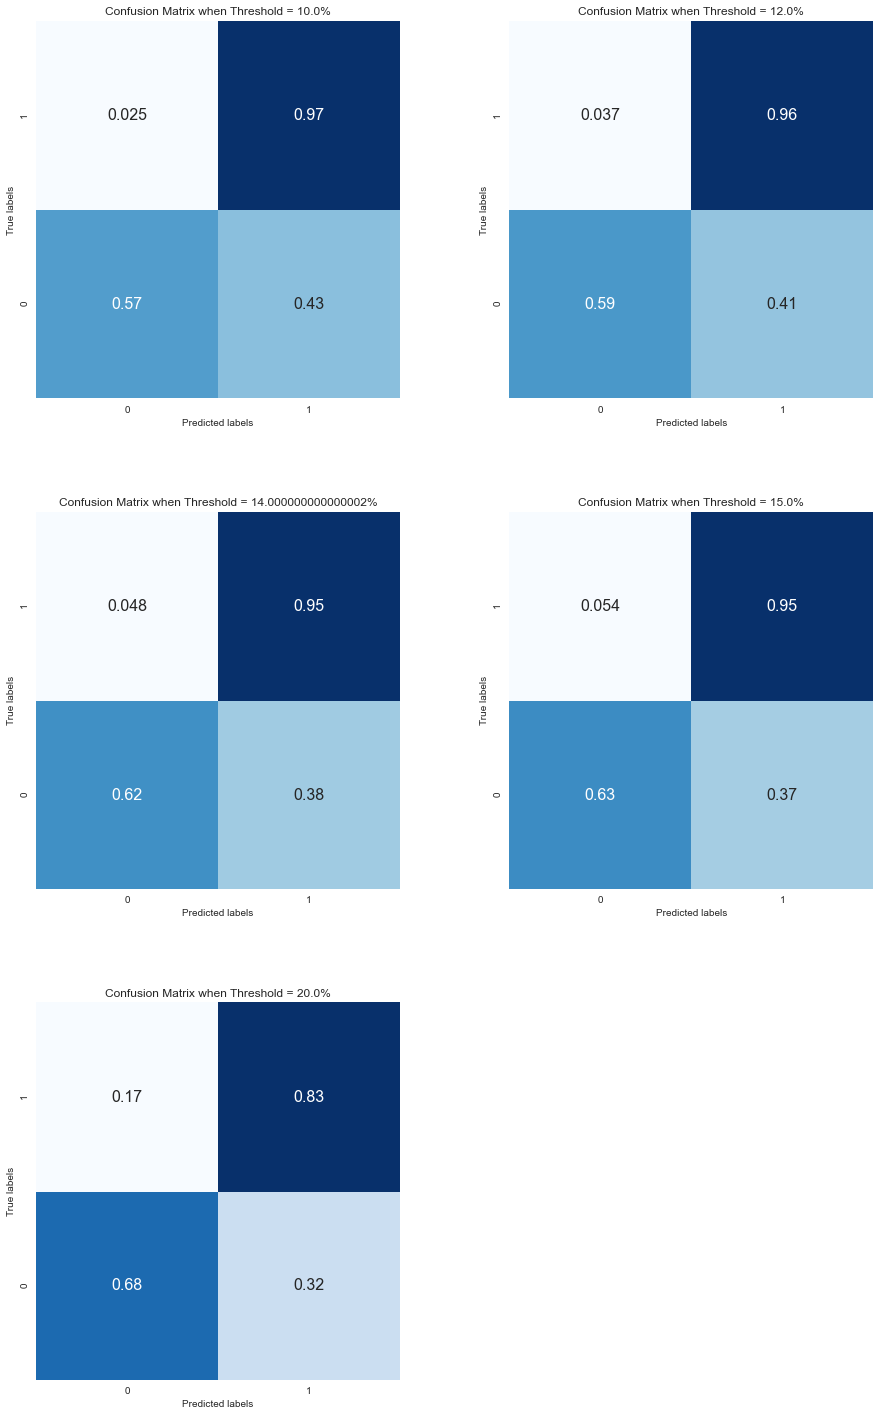

In [53]:
thresholds = [0.1, 0.12, 0.14, 0.15, 0.2, 0.25]
confusion_matrices = []
fig, axes = plt.subplots(figsize=(15,25))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(1, 6):
    ax = plt.subplot(3, 2, i)
    threshold = thresholds[i-1]
    y_pred_proba = logreg.predict_proba(X_train)[:,1]
    y_pred = (y_pred_proba > threshold).astype(int)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=logreg.classes_)
    confusion_matrices.append(disp)

    sns.heatmap(cm_norm, annot=True, cbar=False, cmap='Blues', annot_kws={"fontsize":16})
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix when Threshold = ' + str(threshold*100) + '%');
    ax.set_ylim([0,2])


plt.show()